# GeoSSS Demo

This demo should quickly demonstrate the usage of the new sampling methods introduced in the package.
As a target we use a mixture of von Mises-Fisher (vMF) distribution on a 2-sphere. 

In [8]:
# If we are on colab: this clones the repo and installs the dependencies
from pathlib import Path
if Path.cwd().name != 'geosss':
  !git clone --quiet https://github.com/microscopic-image-analysis/geosss/
  %cd geosss
  !pip install --progress-bar off --quiet -e .


In [9]:
import geosss as gs
import numpy as np

## Setting Parameters

We need to set parameters for the samplers as well as the mixture of vMF distribution as target. Please note, concentration parameter $\kappa$ makes the mixture modes either concentrated around the mean (sharper) or more spread out for a lower $\kappa$.

Therefore, feel free to play with these parameters. However, please note, the demo visualization accepts only $d=3$, but in general, this can be used on any dimension. 

In [2]:
# parameters for mixture of von Mises-Fisher (vMF)
# distributions
d = 3                          # required dimension
K = 3                          # number of mixture components
kappa = 80.0                   # concentration parameter

# mus (mean directions) of the vMF mixture components for a 2-sphere
# represented as a unit quaternion.
mus = np.array([[0.86981638, -0.37077248, 0.32549536],
                [-0.19772391, -0.89279985, -0.40473902],
                [0.19047726, 0.22240888, -0.95616562]])

# sampler parameters
n_samples = int(1e3)           # no. of samples
burnin = int(0.1 * n_samples)  # burnin samples
seed = 3521                    # sampler seed

## Creating the vMF target

By calling the `VonMisesFisher` class and `MixtureModel` class for the library, we can construct our pdf target.

In [3]:
# target pdf
vmfs = [gs.VonMisesFisher(kappa*mu) for mu in mus]
pdf = gs.MixtureModel(vmfs)

## Sampling

We compare our samplers, GeoSSS (reject) and GeoSSS (shrink) with random walk Metropolis-Hastings (RWMH) and Hamiltonian Monte Carlo (HMC). The classes for these are as follows

- GeoSSS (reject): `RejectionSphericalSliceSampler`
- GeoSSS (shrink): `ShrinkageSphericalSliceSampler`
- RWMH: `MetropolisHastings`
- HMC: `SphericalHMC`

In [4]:
# initial state of the samplers
init_state = np.array([-0.86333052,  0.18685286, -0.46877117])

# sampling with the four samplers
samples = {}

# GeoSSS (reject): ideal geodesic slice sampler
rsss = gs.RejectionSphericalSliceSampler(pdf, init_state, seed)
samples['sss-reject'] = rsss.sample(n_samples, burnin)

# GeoSSS (shrink): shrinkage-based geodesic slice sampler
ssss = gs.ShrinkageSphericalSliceSampler(pdf, init_state, seed)
samples['sss-shrink'] = ssss.sample(n_samples, burnin)

# RWMH: random-walk Metropolis Hastings
rwmh = gs.MetropolisHastings(pdf, init_state, seed)
samples['rwmh'] = rwmh.sample(n_samples, burnin)

# HMC: Hamiltonian Monte Carlo
hmc = gs.SphericalHMC(pdf, init_state, seed)
samples['hmc'] = hmc.sample(n_samples, burnin)

## Visualization 3D

Visualization the samples as a scatter plot on a 2-sphere (reproduce the demo in README)

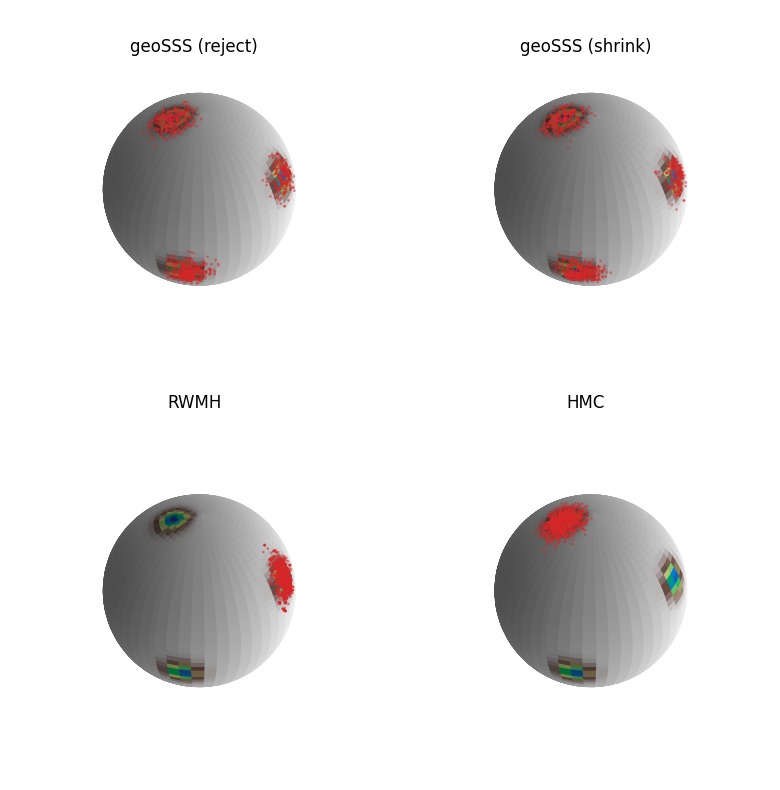

In [5]:
gs.compare_samplers_3d(pdf, samples)